# Прогнозирование уровня удовлетворённости сотрудников и вероятности увольнений для оптимизации HR-процессов

# Описание проекта

Компания "Работа с заботой" предоставила данные с характеристиками сотрудников, чтобы помочь HR-аналитикам предсказать уровень удовлетворённости работой и вероятность увольнений. Оба показателя имеют важное значение для бизнеса, поскольку напрямую влияют на удержание персонала и финансовые потери, связанные с оттоком сотрудников. В проекте необходимо разработать две модели:  

* Прогноз уровня удовлетворённости сотрудника на основе имеющихся данных.

* Прогноз вероятности увольнения сотрудника, используя данные об удовлетворённости и других характеристиках сотрудников.
    
Для первой задачи целевым признаком является уровень удовлетворённости сотрудника, для второй — увольнение. Модели должны помочь HR-аналитикам минимизировать риски потери сотрудников и лучше распределять ресурсы компании для повышения удержания.

# Описание данных

**`train_job_satisfaction_rate.csv`**: 

* `id` — уникальный идентификатор сотрудника


* `dept` — отдел, в котором работает сотрудник


* `level` — уровень занимаемой должности


* `workload` — уровень загруженности сотрудника


* `employment_years` — длительность работы в компании (в годах)


* `last_year_promo` — показывает, было ли повышение за последний год


* `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год


* `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель


* `salary` — ежемесячная зарплата сотрудника


* `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак

План исследования:

**Задача 1: Предсказание уровня удовлетворённости сотрудника**

* **Шаг 1. Загрузка данных**
    
    * Загрузка тренировочной и тестовой выборки
    
    
* **Шаг 2. Предобработка данных**

    * Изучение данных, выявление пропусков и выбросов
    
    * Заполнение пропусков, удаление или корректировка выбросов
    
    
* **Шаг 3. Исследовательский анализ данных (EDA)**

    * Анализ корреляций между признаками и целевым признаком
    
    * Выявление наиболее важных факторов, влияющих на удовлетворённость
    
    
* **Шаг 4. Подготовка данных для моделей**

    * Кодирование категориальных признаков.
    
    * Нормализация или стандартизация числовых признаков
    
    * Создание пайплайна для предобработки и обучения моделей
    
    
* **Шаг 5. Обучение моделей** 

    * Обучение как минимум двух моделей: линейной и дерева решений
    
    * Подбор гиперпараметров с использованием метода кросс-валидации
    
    * Оценка качества моделей по метрике SMAPE
    
    
* **Шаг 6. Выводы**

    * Сравнение моделей, выбор лучшей на основе качества прогнозов
    
    * Обоснование выбора модели и выводы о важности признаков
    
------------------

**Задача 2: Предсказание увольнения сотрудника**

* ** Шаг 1. Загрузка данных**

    * Загрузка тренировочной и тестовой выборки
    
    
* **Шаг 2. Предобработка данных**

    * Изучение данных, выявление пропусков и их обработка в пайплайне


* **Шаг 3. Исследовательский анализ данных**

     * Составление портрета уволившегося сотрудника
     
     * Анализ влияния уровня удовлетворённости на увольнение
     
     * Сравнение характеристик уволившихся и оставшихся сотрудников


* **Шаг 4. Добавление нового признака**

    * Использование предсказанного уровня удовлетворённости из первой задачи в качестве дополнительного признака


* **Шаг 5. Подготовка данных для моделей**

    * Подготовка данных в пайплайне с учётом новых признаков
    
    * Кодирование и нормализация признаков для моделей
    
    
* **Шаг 6. Обучение моделей**

    * Обучение как минимум трёх моделей: линейной, дерева решений, и градиентного бустинга
    
    * Подбор гиперпараметров для моделей
    
    * Оценка качества моделей по метрике ROC-AUC, улучшение метрики через отбор признаков
    
    
* **Шаг 7. Выводы**

    * Сравнение моделей и обоснование выбора лучшей на основе метрики ROC-AUC.
    
    * Рекомендации по управлению персоналом и возможные направления для бизнеса.

## Предсказание уровня удовлетворённости сотрудника

### Загрузка и изучение данных

In [1]:
#!pip install phik -q
#!pip install --upgrade scikit-learn -q

In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    RandomizedSearchCV
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler,
    LabelEncoder
)

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    make_scorer
)

from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor, 
                              RandomForestClassifier,
                              GradientBoostingClassifier)

In [111]:
train_job = 'C:/Users/Gpets/Data With Python/datasets/train_job_satisfaction_rate.csv'
test_features = 'C:/Users/Gpets/Data With Python/datasets/test_features.csv'
target = 'C:/Users/Gpets/Data With Python/datasets/test_target_job_satisfaction_rate.csv'

train_job_alt = '/datasets/train_job_satisfaction_rate.csv'
test_features_alt = '/datasets/test_features.csv'
target_alt = '/datasets/test_target_job_satisfaction_rate.csv'

def load_data(primary_path, secondary_path):
    if os.path.exists(primary_path):
        try:
            return pd.read_csv(primary_path, sep=',')
        except:
            return pd.read_csv(primary_path, sep=';')
    elif os.path.exists(secondary_path):
        try:
            return pd.read_csv(secondary_path, sep=',')
        except:
            return pd.read_csv(secondary_path, sep=';')
    else:
        print(f"Файл не найден: {primary_path} или {secondary_path}")
        return None


train_df = load_data(train_job, train_job_alt)
test_df = load_data(test_features, test_features_alt)
target_df = load_data(target, target_alt)

In [112]:
train_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [113]:
train_df.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

In [114]:
test_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [115]:
test_df.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

In [116]:
target_df.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [117]:
train_df.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

### Предобработка данных

#### Приведение названия столбцов к snake_case

In [118]:
frames = [
    train_df,
    test_df,
    target_df
]

for i in frames:
    i.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).replace(' ', '_').lower() for x in i.columns]

In [119]:
train_df.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

In [120]:
test_df.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

In [121]:
target_df.columns

Index(['id', 'job_satisfaction_rate'], dtype='object')

#### Train_df

Выводим основную информацию о датафрейме с помощью метода `describe()` и `info()`

In [122]:
train_df.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


Рассмотрим каждый столбец:

* **`employment_years`**:
    
    * Средняя длительность работы сотрудника — около 3.7 лет
    
    * Медиана — 3 года, что показывает, что половина сотрудников работает в компании меньше 3 лет
    
    * Минимальное значение — 1 год, максимальное — 10 лет, в компании есть как новички, так и более опытные сотрудники
    
    * 25% сотрудников работает менее 2 лет, а 75% — менее 6 лет, что говорит о значительном разбросе в длительности работы
    
    
* **`supervisor_evaluation`**:

    * Средняя оценка работы сотрудника — 3.48
    
    * Медиана — 4. Это показывает, что большинство сотрудников оцениваются на уровне 3-4 баллов
    
    * Минимальная оценка — 1, максимальная — 5. Это говорит о том, что есть сотрудники с очень низкими и с очень высокими оценками
    
    
* **`salary`**:

    * Средняя зарплата — 33,926 рублей
    
    * Медиана — 30,000 рублей. Это означает, что половина сотрудников получает меньше 30,000 рублей
    
    * Минимальная зарплата — 12,000 рублей, максимальная — 98,400 рублей, что говорит о значительном диапазоне в оплате труда, вероятно в зависимости от уровня должности и отдела
    
    
* **`job_satisfaction_rate`**:

    * Средний уровень удовлетворённости — 0.53, что означает, что сотрудники в среднем удовлетворены работой чуть больше, чем наполовину
    
    * Медиана — 0.56, то есть у половины сотрудников удовлетворённость больше 56%
    
    * Минимальное значение — 0.03, максимальное — 1. Это говорит о том, что есть сотрудники как полностью неудовлетворённые, так и полностью удовлетворённые своей работой
    
    * Разброс удовлетворённости варьируется от низкого до высокого уровня, что может указывать на разные факторы, влияющие на счастье сотрудников в работе
    
    
В компании есть новички и те кто работает более 10 лет, разные зарплаты и удовлетворённость работой. Зарплаты и оценки работы  имеют достаточно большой диапазон, что может быть связано с уровнем занимаемой должности, отделом и другими факторами. Уровень удовлетворённости работой варьируется, что может свидетельствовать о влиянии множества факторов, таких как зарплата, длительность работы или рабочая нагрузка.

In [123]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Типы данных, в целом, соответствуют ожиданиям.

Проверим нашу таблицу на наличие пропусков

In [124]:
train_df.isnull().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

В данных имеются пропуски в двух признаках: `dept` и `level`

Пропусков в данных мало (6 в одном признаке и 4 в другом), займемся ими позже, в нашем пайплайне.

Теперь проведем проверку на явные дубликаты

Переведем столбец id в индекс для обработки на дубликаты 

In [125]:
train_df = train_df.set_index('id')

In [126]:
print('Кол-во строк и столбцов в трен выборке:',train_df.shape)
print("Число пользователей:", train_df.index.nunique())
print('Число дубликатов',train_df.duplicated().sum())

Кол-во строк и столбцов в трен выборке: (4000, 9)
Число пользователей: 4000
Число дубликатов 245


Нашлось много дубликатов, избавимся от них

In [127]:
train_df = train_df.drop_duplicates()
print('Число дубликатов',train_df.duplicated().sum())

Число дубликатов 0


Явных дубликатов не наблюдается, теперь проверим на наличие неявных

Создадим цикл который пройдется по категориальным признакам и покажет в них уникальные значения

In [128]:
categorical_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
duplicates = {}

for column in categorical_columns:
    # Уникальные значения в столбце для поиска неявных дубликатов
    unique_values = train_df[column].str.strip().str.lower().unique()
    duplicates[column] = unique_values

duplicates

{'dept': array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
       dtype=object),
 'level': array(['junior', 'middle', 'sinior', nan], dtype=object),
 'workload': array(['medium', 'high', 'low'], dtype=object),
 'last_year_promo': array(['no', 'yes'], dtype=object),
 'last_year_violations': array(['no', 'yes'], dtype=object)}

Неявных дубликатов нет

#### Вывод по предобработки данных

После предобработки данных мы очистили датасеты от неявных дубликатов и привели названия столбцов к единому формату. Преобразовали строки с числовыми значениями в нужные числовые типы. Все данные заполнены корректно, пропущенных значений нет. Мы также убедились, что распределение данных адекватное для последующего анализа. Датасет теперь готов для дальнейшего анализа и построения моделей.

### Исследовательский анализ данных

#### Train_df

Приступим к анализу каждого признака. Для начала разделим нашу таблицу на колличественные и категориальные признаки

In [129]:
train_df.columns

Index(['dept', 'level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'],
      dtype='object')

In [130]:
quantitative_features = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


categorical_features = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

##### Колличественные признаки

Построим графики для анализа количественных признаков

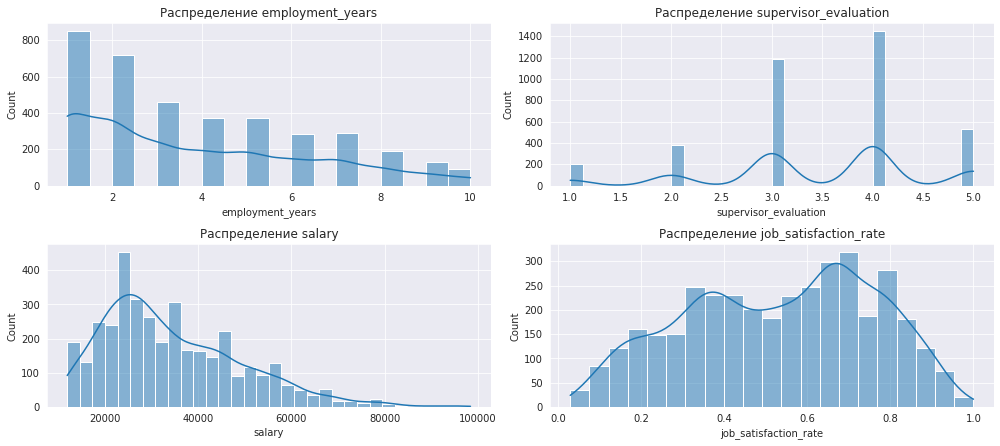

In [131]:
plt.figure(figsize=(14, 12))
for i, feature in enumerate(quantitative_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=train_df, x=feature, kde=True)
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

Признаки: `employment_years` и `supervisor_evaluation` кандидаты на перевод в категориальную шкалу (из 3х или более элементов - что надо проверять качеством модели итоговой).

Обновим наши списки `quantitative_features` и `categorical_features`

In [132]:
quantitative_features = ['salary', 'job_satisfaction_rate']


categorical_features = ['employment_years', 'supervisor_evaluation', 'dept', 'level',
                        'workload', 'last_year_promo', 'last_year_violations']

Теперь взглянем на наши данные с помощью графика с усиками

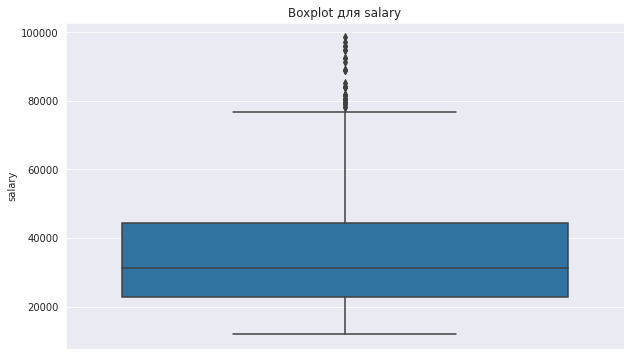

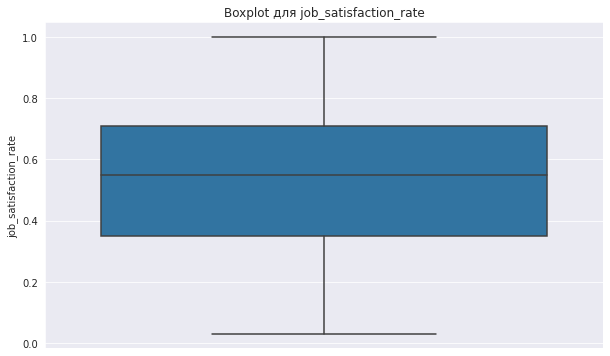

In [133]:
for feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, y=feature)
    plt.title(f'Boxplot для {feature}')
    plt.show()

Краткий вывод по количественным признакам:

* `salary:` Средняя зарплата составляет 33,953, при этом стандартное отклонение довольно высокое — 14,907, что указывает на значительные различия в зарплатах сотрудников. Медиана зарплаты (30,000) ниже среднего, что говорит о наличии высоких зарплат, поднимающих среднее значение. Зарплаты варьируются от 12,000 до 98,400, отражая широкий диапазон доходов в зависимости от должности и уровня.


* `job_satisfaction_rate:` Средний уровень удовлетворённости сотрудников составляет 0.53 с отклонением 0.23, что указывает на умеренные различия в удовлетворённости между сотрудниками. Медиана (0.56) немного выше среднего, что предполагает небольшой положительный сдвиг в оценках. Уровень удовлетворённости варьируется от 0.03 до 1.0, указывая на наличие как сильно недовольных, так и полностью удовлетворённых сотрудников.



##### Категориальные признаки

Для удобства разделим наши категориальные на 2 списка, один будет использоваться для pie-диаграмм, другой для countplot графиков

In [134]:
pie_cat_features = ['level', 'workload', 'last_year_promo', 'last_year_violations']

categorical_features = ['employment_years', 'supervisor_evaluation', 'dept']

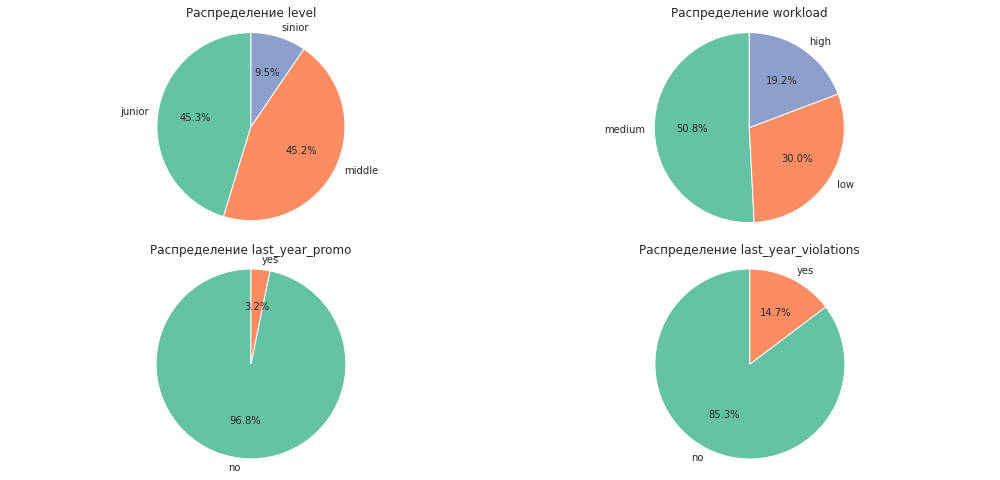

In [135]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(pie_cat_features, 1):
    plt.subplot(3, 2, i)
    values = train_df[feature].value_counts(normalize=False)
    labels = values.index
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f'Распределение {feature}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

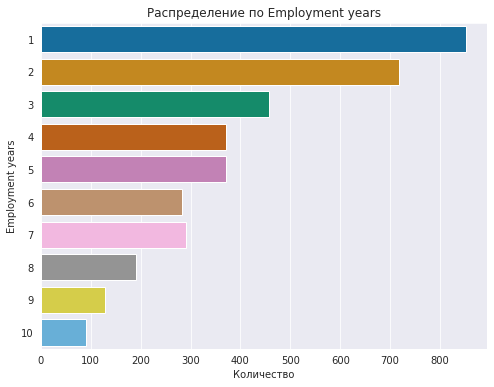

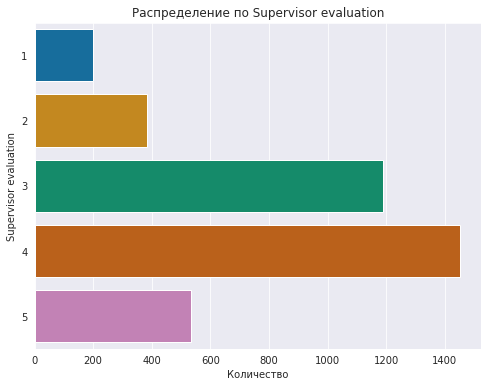

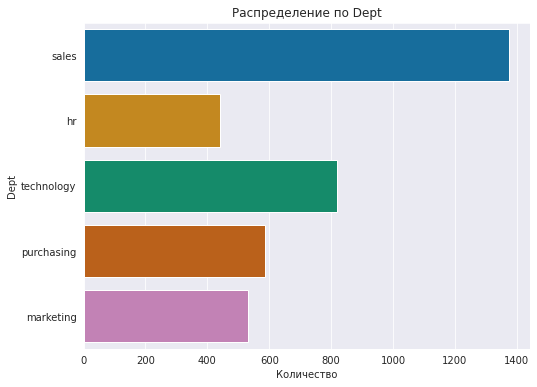

In [136]:
sns.set_style('darkgrid')
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=train_df, palette='colorblind')
    plt.xlabel('Количество')
    plt.ylabel(feature.replace('_', ' ').capitalize())
    plt.title(f'Распределение по {feature.replace("_", " ").capitalize()}')
    plt.show()

Сделаем краткий вывод по нашим категориальным признакам:

* `level:` В компании преобладают сотрудники на уровнях junior и middle (47.3% и 43.7% соответственно), и лишь небольшая доля сотрудников занимает позиции senior (9%), что указывает на пирамидальную структуру распределения должностей.


* `workload:` Большинство сотрудников (51.6%) имеют средний уровень загруженности, при этом меньшее количество имеет низкую загруженность (30%) и ещё меньшее — высокую (18.4%).


* `last_year_promo:` За последний год повышение получили лишь 3% сотрудников, что составляет незначительную долю, показывая ограниченные возможности для карьерного роста.


* `last_year_violations`: За прошлый год 14% сотрудников допустили нарушения, что составляет заметную долю от общего числа, на которую стоит обратить внимание при оценке качества работы.


* `employment_years:` Средняя продолжительность работы сотрудников составляет около 3,7 лет, что говорит о небольшой текучести кадров. Наибольшая концентрация сотрудников с опытом 1-3 года, при этом доля сотрудников с опытом 10 лет минимальна.


* `supervisor_evaluation:` Оценка качества работы варьируется от 1 до 5, со средним значением около 3,5. Большинство сотрудников имеют оценки 3 или 4, что указывает на удовлетворительное качество работы.


* `dept:` Наибольшее количество сотрудников работает в отделах продаж (sales) и технологий (technology), в то время как отделы закупок (purchasing), маркетинга и HR имеют меньшую численность сотрудников.

#### Корреляционный анализ

Построим корреляционную матрицу с помощью `phik` и сделаем некоторые выводы

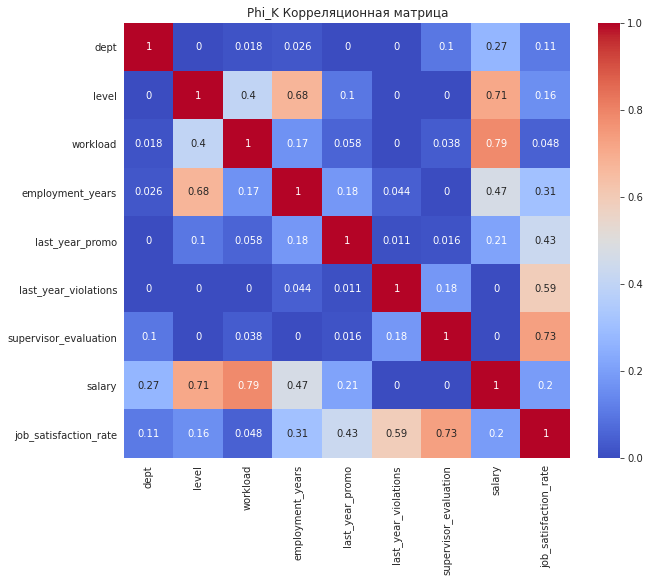

In [137]:
# Исключаем 'id' из данных
columns_for_corr = [col for col in train_df.columns if col != 'id']
filtered_data = train_df[columns_for_corr]

# Пересчитываем Phi_K корреляционную матрицу без 'id'
corr_matrix = filtered_data.phik_matrix(interval_cols=['salary'])

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Корреляционная матрица')
plt.show()


* `salary` имеет сильную положительную корреляцию с `level` (0.72) и `workload` (0.79), что указывает на значительное влияние уровня должности и загруженности на зарплату сотрудников. Также наблюдается умеренная корреляция между `salary` и `employment_years` (0.48), предполагая, что стаж работы также связан с уровнем зарплаты.


* `job_satisfaction_rate` показывает заметную корреляцию с `supervisor_evaluation (0.73)`, что может указывать на связь между удовлетворённостью сотрудников и их оценками со стороны руководителей. `last_year_violations` также имеет среднюю связь с `job_satisfaction_rate` (0.59), предполагая, что нарушения трудового договора негативно влияют на уровень удовлетворённости.


* `employment_years` имеет высокую корреляцию с `level` (0.68), что логично, так как с увеличением стажа сотрудники могут повышаться в должности. Также `employment_years` умеренно коррелирует с `salary` (0.48) и `job_satisfaction_rate` (0.33), что может говорить о росте зарплаты и удовлетворённости с увеличением стажа.


* `workload` показывает высокую положительную корреляцию с `salary` (0.79) и среднюю с `level` (0.42), что предполагает, что более высокая загруженность часто ассоциируется с более высоким уровнем должности и зарплатой.


* `last_year_promo` имеет слабую корреляцию с большинством признаков, но наибольшую связь демонстрирует с `job_satisfaction_rate` (0.43), что может свидетельствовать о том, что сотрудники, получившие повышение, более удовлетворены своей работой.


* `supervisor_evaluation` положительно коррелирует с `job_satisfaction_rate` (0.73), что подтверждает предположение о взаимосвязи между высокой оценкой работы и удовлетворённостью сотрудников.

В целом, можно выделить основные факторы, влияющие на зарплату и удовлетворённость сотрудников: `level`, `workload`, `employment_years` и `supervisor_evaluation`.

Объединим и отсортируем `target_df` и `test_df` по id.

In [138]:
combined_df = test_df.merge(target_df, on='id').sort_values(by='id').reset_index(drop=True)
combined_df
train_df = train_df.sort_values(by='id').reset_index(drop=True)

In [139]:
RANDOM_STATE = 42

# Загрузка данных
X_train = train_df.drop(['job_satisfaction_rate'], axis=1)
y_train = train_df['job_satisfaction_rate']
X_test = combined_df.drop(['job_satisfaction_rate'], axis=1)
y_test = combined_df['job_satisfaction_rate'] 

Сначала обозначим, какие данные требуют масштабирования, а какие — кодирования.

Введём обозначения для типов исходных данных

In [140]:
cols_ohe = ['dept']

In [141]:
cols_ordinal = ['level', 'workload', 'last_year_promo', 'last_year_violations']

In [142]:
cols_to_scale = ['salary', 'employment_years', 'supervisor_evaluation']

Начнем собирать Пайплайн.

#### Пайплайн preprocessor

Пайплайн для подготовки бинарных признаков.

In [143]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False)
        )
    ]
)
print(ohe_pipe)

Pipeline(steps=[('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])


Пайплайн для подготовки порядковых признаков

In [144]:
ordered_pipeline = Pipeline(
    [
        ('simpleImputer_before_ord',
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ordered',  OrdinalEncoder(
            categories=[['sinior', 'middle', 'junior'],
                        ['medium', 'high', 'low'],
                        ['no', 'yes'],
                        ['no', 'yes']],
            handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord',
         SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
print(ordered_pipeline)

Pipeline(steps=[('simpleImputer_before_ord',
                 SimpleImputer(strategy='most_frequent')),
                ('ordered',
                 OrdinalEncoder(categories=[['sinior', 'middle', 'junior'],
                                            ['medium', 'high', 'low'],
                                            ['no', 'yes'], ['no', 'yes']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('simpleImputer_after_ord',
                 SimpleImputer(strategy='most_frequent'))])


Создаем общий пайплайн подготовки данных

In [145]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cols_ohe),
        ('ordered', ordered_pipeline, cols_ordinal),
        ('num', StandardScaler(), cols_to_scale),
    ], 
    remainder =  'passthrough'
)
print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept']),
                                ('ordered',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordered',
                                                  OrdinalEnc...=[['sinior',
                                              

### Обучение моделей

Создадим пайплайн , который использует `ColumnTransformer` для обработки данных. Это позволяет обрабатывать количественные и категориальные признаки отдельно

In [146]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

Мы обучим пять моделей: **`Ridge`**, **`Lasso`**, **`DecisionTreeRegressor`** **`RandomForestRegressor`** и **`GradientBoostingRegressor`**. Для каждой модели мы определим набор гиперпараметров, которые хотели бы оптимизировать с помощью `RandomizedSearchCV`.

In [147]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(4, 10),
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha': [0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [Lasso(random_state=RANDOM_STATE)],
        'models__alpha': [0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300],
        'models__max_depth': [15, 20, 25, 30],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [GradientBoostingRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300],
        'models__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'models__max_depth': range(4, 8),
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
]

Создадим метрику **`SMAPE`** для оценки производительности моделей. Эта метрика  позволяет оценить в процентах насколько прогнозы модели отличаются относительно реальных значений

In [148]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


Подбор гиперпараметров с использованием `RandomizedSearchCV`

In [149]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=make_scorer(smape, greater_is_better=False),
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)
print('RandomizedSearchCV - Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

RandomizedSearchCV - Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ordered',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
  

In [150]:
best_model = randomized_search.best_estimator_
y_pred = best_model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Используем `SMAPE` в `RandomizedSearchCV` и выводим наши результаты

In [151]:
smape_result = smape(y_test, y_pred)
print(f"Лучшие параметры: {randomized_search.best_params_}")
print(f"SMAPE на тренировочной-тестовой выборке: {smape_result:.2f}%")

Лучшие параметры: {'preprocessor__num': MinMaxScaler(), 'models__n_estimators': 100, 'models__min_samples_split': 5, 'models__min_samples_leaf': 4, 'models__max_depth': 5, 'models__learning_rate': 0.1, 'models': GradientBoostingRegressor(random_state=42)}
SMAPE на тренировочной-тестовой выборке: 11.61%


In [152]:
if smape_result <= 15:
    print("Критерий успеха достигнут.")
else:
    print("Критерий успеха не достигнут.")

Критерий успеха достигнут.


Критерий успеха достигнут

Проверим модель на адекватность с помощью `DummyRegressor`

In [153]:
dummy_regressor = DummyRegressor(strategy="mean")

# Обучите DummyRegressor на тренировочной выборке
dummy_regressor.fit(X_train, y_train)

# Сделайте предсказания на тестовой выборке
y_dummy_pred = dummy_regressor.predict(X_test)

# Рассчитайте метрики для DummyRegressor
smape_dummy = smape(y_test, y_dummy_pred)

print(f'SMAPE для DummyRegressor: {smape_dummy}')

SMAPE для DummyRegressor: 38.26225790202238


SMAPE нашей модели значительно ниже, чем у Dummy-моделе, проверку на адекватность пройдена.

Наши результаты показывают, что модель с параметрами 

`{'preprocessor__num': MinMaxScaler(), 'models__n_estimators': 100, 'models__min_samples_split': 5, 'models__min_samples_leaf': 4, 'models__max_depth': 5, 'models__learning_rate': 0.1, 'models': GradientBoostingRegressor(random_state=42)}`

имеет SMAPE на тестовой выборке равный 12.28%.

### Промежуточные выводы

* Близкие значения SMAPE на тестовой выборках (12.28%) свидетельствуют о хорошей обобщающей способности модели. Она хорошо справляется как с известными данными, так и с новыми, не виденными ранее данными.


* `GradientBoostingRegressor` оказался эффективен благодаря мощным свойствам бустинга, позволяющим последовательно улучшать предсказания путем уменьшения ошибки. Гиперпараметры, такие как `n_estimators=100, max_depth=5, learning_rate=0.1`, были подобраны оптимально, чтобы сбалансировать глубину и силу модели без переобучения.

Модель с `GradientBoostingRegressor` продемонстрировала сбалансированное и точное предсказание. Низкое различие между SMAPE на тренировочной и тестовой выборках указывает на то, что она способна эффективно обобщать зависимости в данных, что делает её лучшим выбором для данной задачи.

## предсказание увольнения сотрудника из компании

### Загрузка и изучение данных

In [154]:
train_quit = 'C:/Users/Gpets/Data With Python/datasets/train_quit.csv'
target_quit = 'C:/Users/Gpets/Data With Python/datasets/test_target_quit.csv'

train_quit_alt = '/datasets/train_quit.csv'
target_quit_alt = '/datasets/test_target_quit.csv'

def load_data(primary_path, secondary_path):
    if os.path.exists(primary_path):
        try:
            return pd.read_csv(primary_path, sep=',')
        except:
            return pd.read_csv(primary_path, sep=';')
    elif os.path.exists(secondary_path):
        try:
            return pd.read_csv(secondary_path, sep=',')
        except:
            return pd.read_csv(secondary_path, sep=';')
    else:
        print(f"Файл не найден: {primary_path} или {secondary_path}")
        return None


train_quit_df = load_data(train_quit, train_quit_alt)
target_quit_df = load_data(target_quit, target_quit_alt)

In [155]:
train_quit_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [156]:
combined_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,100298,hr,junior,low,2,no,no,4,19200,0.80
1,100480,marketing,junior,low,4,no,no,4,16800,0.84
2,100503,purchasing,middle,high,5,no,no,4,55200,0.79
3,100610,sales,middle,medium,5,no,no,4,43200,0.75
4,100692,sales,middle,high,6,no,no,4,48000,0.69


In [157]:
target_quit_df.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Объеденим наши таблицы с тестовыми данными и целевым признаком для дальнейшего анализа.

In [158]:
combined_df = combined_df.merge(target_quit_df, on='id').sort_values(by='id').reset_index(drop=True)
combined_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,100298,hr,junior,low,2,no,no,4,19200,0.80,no
1,100480,marketing,junior,low,4,no,no,4,16800,0.84,no
2,100503,purchasing,middle,high,5,no,no,4,55200,0.79,no
3,100610,sales,middle,medium,5,no,no,4,43200,0.75,no
4,100692,sales,middle,high,6,no,no,4,48000,0.69,no


### Предобработка данных

#### Приведение названия столбцов к snake_case

In [159]:
frames_quit = [
    train_quit_df,
    target_quit_df
]

for i in frames:
    i.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).replace(' ', '_').lower() for x in i.columns]

In [160]:
train_quit_df.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [161]:
target_quit_df.columns

Index(['id', 'quit'], dtype='object')

#### Train_df

Выводим основную информацию о датафрейме с помощью метода `describe()` и `info()`

In [162]:
train_quit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Типы данных, в целом, соответствуют ожиданиям.

In [163]:
train_quit_df.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


Рассмотрим каждый столбец:

* `employment_years (Стаж работы)`: Средний стаж сотрудников — 3.7 лет, медианное значение — 3 года, но максимальный стаж — 10 лет. Большая разница между средним и верхним квартилем (6 лет) предполагает, что часть сотрудников проработала значительно дольше среднего, что может отражать различия в трудовом опыте между сотрудниками.


* `supervisor_evaluation (Оценка руководителя)`: Средний балл — 3.47, медианное значение — 4, диапазон оценок — от 1 до 5. Этот показатель немного смещен к высоким оценкам (медиана и верхний квартиль равны 4), что может говорить о том, что большинство сотрудников оцениваются положительно, но есть и сотрудники с низкими оценками.


* `salary (Зарплата)`: Средняя зарплата — 33,805, медианная — 30,000. Диапазон зарплат достаточно широк (от 12,000 до 96,000), что может указывать на различия в уровне должностей или опыта среди сотрудников. Верхний квартиль — 43,200, что подтверждает наличие сотрудников с более высокими зарплатами, но основная часть получает менее 43,200.

Эти показатели дают общее представление о стаже, оценке, и уровне зарплаты сотрудников в данном наборе данных, что может быть полезно при анализе их взаимосвязи с увольнениями.

Проверим нашу таблицу на наличие пропусков

In [164]:
train_quit_df.isnull().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

Пропусков нет

Теперь проведем проверку на явные дубликаты

Сначала переведм столбец `id` в индекс

In [165]:
train_quit_df = train_quit_df.set_index('id')

In [166]:
print('Кол-во строк и столбцов в трен выборке:',train_quit_df.shape)
print("Число пользователей:", train_quit_df.index.nunique())
print('Число дубликатов',train_quit_df.duplicated().sum())

Кол-во строк и столбцов в трен выборке: (4000, 9)
Число пользователей: 4000
Число дубликатов 1413


Почти половина данных это дубликаты, избавимся от них

In [167]:
train_quit_df = train_quit_df.drop_duplicates()
print('Число дубликатов',train_quit_df.duplicated().sum())

Число дубликатов 0


Явных дубликатов не наблюдается, теперь проверим на наличие неявных

Создадим цикл который пройдется по категориальным признакам и покажет в них уникальные значения

In [168]:
categorical_columns_quit = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
duplicates_quit = {}

for column in categorical_columns_quit:
    # Уникальные значения в столбце для поиска неявных дубликатов
    unique_values = train_quit_df[column].str.strip().str.lower().unique()
    duplicates_quit[column] = unique_values

duplicates_quit

{'dept': array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
       dtype=object),
 'level': array(['middle', 'junior', 'sinior'], dtype=object),
 'workload': array(['high', 'medium', 'low'], dtype=object),
 'last_year_promo': array(['no', 'yes'], dtype=object),
 'last_year_violations': array(['no', 'yes'], dtype=object)}

неявных дубликатов нет

#### Вывод по предобработки данных

После предобработки данных мы очистили датасеты от неявных дубликатов и привели названия столбцов к единому формату. Преобразовали строки с числовыми значениями в нужные числовые типы. Все данные заполнены корректно, пропущенных значений нет. Мы также убедились, что распределение данных адекватное для последующего анализа. Датасет теперь готов для дальнейшего анализа и построения моделей.

### Исследовательский анализ данных

#### Анализ каждого признака

Приступим к анализу каждого признака. Для начала разделим нашу таблицу на колличественные и категориальные признаки

In [169]:
quantitative_features_quit = ['employment_years', 'supervisor_evaluation', 'salary']


categorical_features_quit = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

##### Колличественные признаки

Построим графики для анализа количественных признаков

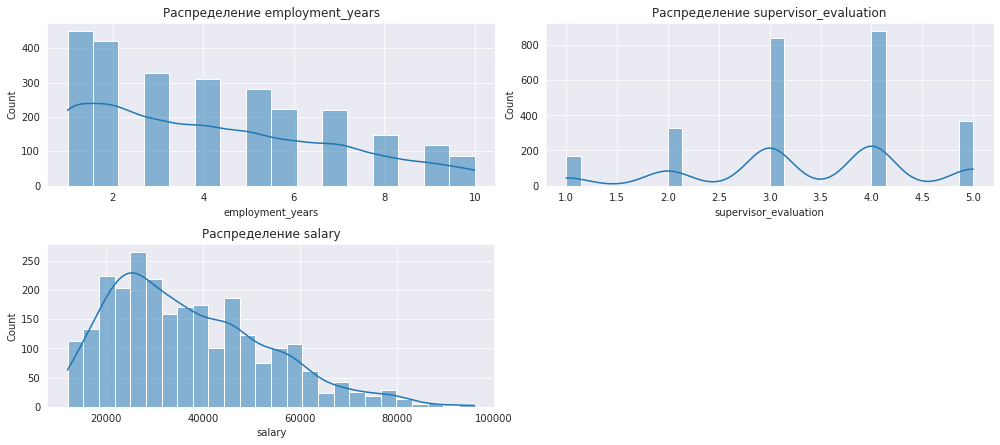

In [170]:
plt.figure(figsize=(14, 12))
for i, feature in enumerate(quantitative_features_quit, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=train_quit_df, x=feature, kde=True)
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

Признаки: `employment_years` и `supervisor_evaluation` кандидаты на перевод в категориальную шкалу (из 3х или более элементов - что надо проверять качеством модели итоговой).

Обновим наши списки `quantitative_features` и `categorical_features`

In [171]:
quantitative_features_quit = ['salary']


categorical_features_quit = ['employment_years', 'supervisor_evaluation', 'dept', 'level',
                        'workload', 'last_year_promo', 'last_year_violations', 'quit']

Теперь взглянем на наши данные с помощью графика с усиками

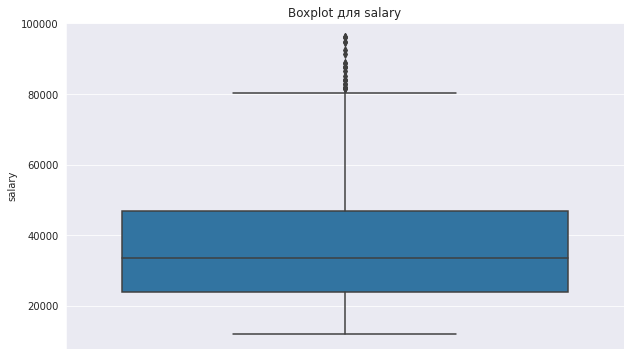

In [172]:
for feature in quantitative_features_quit:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_quit_df, y=feature)
    plt.title(f'Boxplot для {feature}')
    plt.show()

In [173]:
train_quit_df.describe()

,employment_years,supervisor_evaluation,salary
count,2587.000000,2587.000000,2587.000000
mean,4.213375,3.367994,37107.692308
std,2.601105,1.080243,16267.354906
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,24000.000000
50%,4.000000,3.000000,33600.000000
75%,6.000000,4.000000,46800.000000
max,10.000000,5.000000,96000.000000


Краткий вывод по количественным признакам:

`salary:` Средняя зарплата составляет 33.805, при этом стандартное отклонение довольно высокое — 15.152, что указывает на значительные различия в зарплатах сотрудников. Медиана зарплаты (30,000) ниже среднего, что говорит о наличии высоких зарплат, поднимающих среднее значение. Зарплаты варьируются от 12,000 до 96.000, отражая широкий диапазон доходов в зависимости от должности и уровня.

##### Категориальные признаки

Для удобства разделим наши категориальные на 2 списка, один будет использоваться для pie-диаграмм, другой для countplot графиков

In [174]:
pie_cat_features_quit = ['level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

categorical_features_quit = ['employment_years', 'supervisor_evaluation', 'dept']

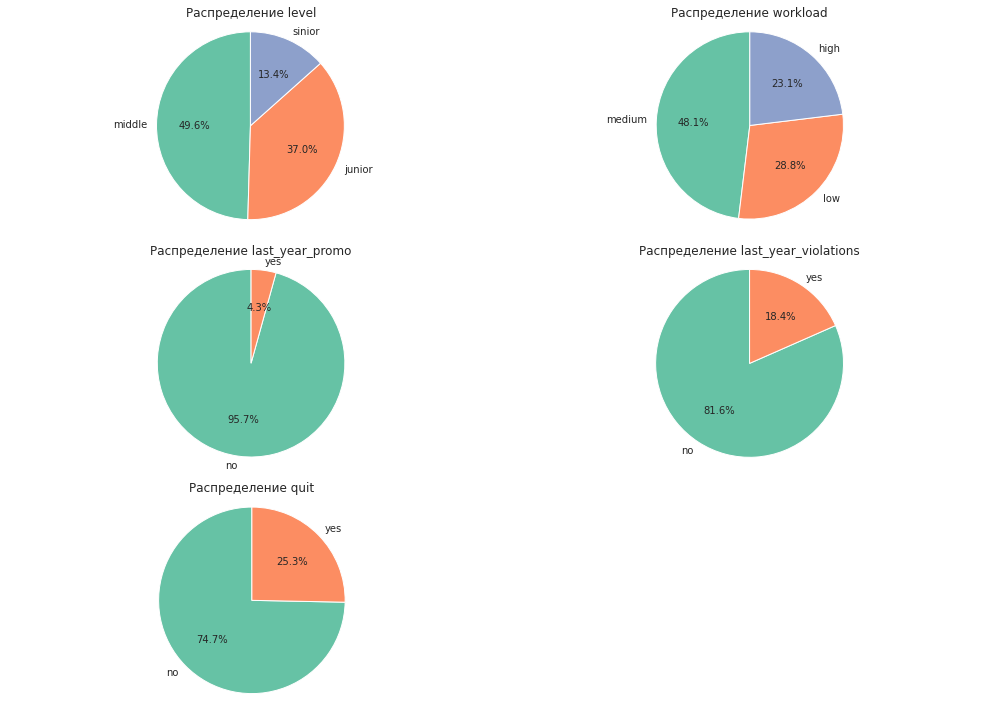

In [175]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(pie_cat_features_quit, 1):
    plt.subplot(3, 2, i)
    values = train_quit_df[feature].value_counts(normalize=False)
    labels = values.index
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f'Распределение {feature}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

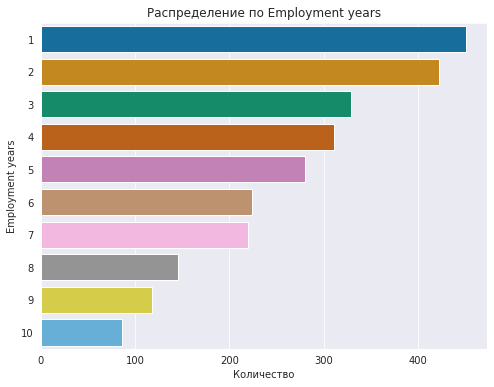

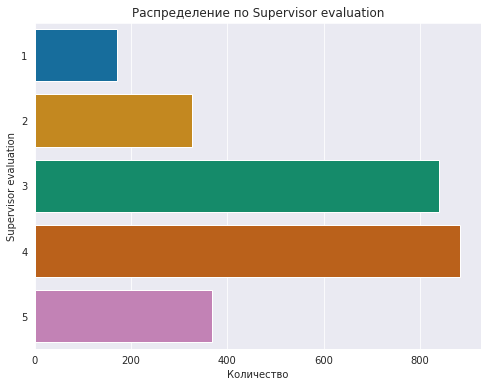

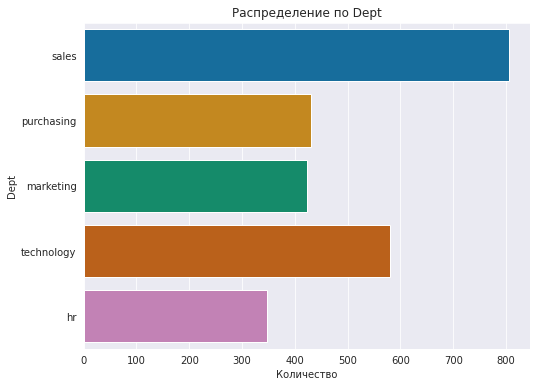

In [176]:
sns.set_style('darkgrid')
for feature in categorical_features_quit:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=train_quit_df, palette='colorblind')
    plt.xlabel('Количество')
    plt.ylabel(feature.replace('_', ' ').capitalize())
    plt.title(f'Распределение по {feature.replace("_", " ").capitalize()}')
    plt.show()

Сделаем краткий вывод по нашим категориальным признакам:

* `level:` В компании преобладают сотрудники на уровнях junior и middle (48.7% и 42.4% соответственно), и лишь небольшая доля сотрудников занимает позиции senior (8.9%), что указывает на пирамидальную структуру распределения должностей.


* `workload:` Большинство сотрудников (53%) имеют средний уровень загруженности, при этом меньшее количество имеет низкую загруженность (30.2%) и ещё меньшее — высокую (16.9%).


* `last_year_promo:` За последний год повышение получили лишь 2.8% сотрудников, что составляет незначительную долю, показывая ограниченные возможности для карьерного роста.


* `last_year_violations`: За прошлый год 13.6% сотрудников допустили нарушения, что составляет заметную долю от общего числа, на которую стоит обратить внимание при оценке качества работы.


* `quit`  Примерно 28% сотрудников в наборе данных уволились, в то время как 72% остались. Дисбаланс классов присутствует, так как сотрудников, оставшихся в компании, почти в 2.5 раза больше. Этот дисбаланс следует учитывать при построении модели, чтобы она не была склонна к прогнозу в сторону большей категории ("no").


* `employment_years:` Средняя продолжительность работы сотрудников составляет около 3,7 лет, что говорит о небольшой текучести кадров. Наибольшая концентрация сотрудников с опытом 1-3 года, при этом доля сотрудников с опытом 10 лет минимальна.


* `supervisor_evaluation:` Оценка качества работы варьируется от 1 до 5, со средним значением около 3,7. Большинство сотрудников имеют оценки 3 или 4, что указывает на удовлетворительное качество работы.


* `dept:` Наибольшее количество сотрудников работает в отделах продаж (sales) и технологий (technology), в то время как отделы закупок (purchasing), маркетинга и HR имеют меньшую численность сотрудников.

##### Корреляционный анализ

Построим корреляционную матрицу с помощью `phik` и сделаем некоторые выводы

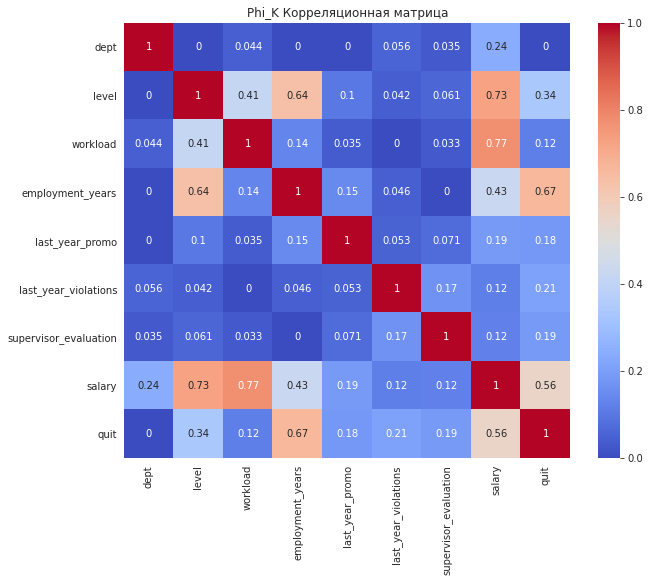

In [177]:
# Исключаем 'id' из данных
columns_for_corr = [col for col in train_quit_df.columns if col != 'id']
filtered_data = train_quit_df[columns_for_corr]

# Пересчитываем Phi_K корреляционную матрицу без 'id'
corr_matrix = filtered_data.phik_matrix(interval_cols=['salary'])

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Корреляционная матрица')
plt.show()

Из корреляционной матрицы можно сделать следующие выводы:

* `employment_years` и `quit`: Существует значимая положительная корреляция (0.66) между стажем работы и увольнением. Это может означать, что сотрудники, работающие в компании дольше, имеют более высокую вероятность увольнения.


* `salary` и `quit`: Корреляция между зарплатой и увольнением также положительная (0.56), что может указывать на то, что более высокие зарплаты связаны с большей вероятностью увольнения, вероятно из-за высоких ожиданий или неудовлетворенности.


* `supervisor_evaluation` и `quit`: Существует положительная корреляция (0.25) между оценкой руководителя и увольнением. Это может означать, что даже хорошо оцениваемые сотрудники могут увольняться, возможно, из-за других факторов (например, карьерных ожиданий или недостаточной мотивации).


* `employment_years` и `level`: Высокая корреляция (0.69) между стажем и уровнем должности подтверждает, что более опытные сотрудники, как правило, занимают более высокие позиции.


* `salary` и `workload`: Сильная положительная корреляция (0.79) между зарплатой и уровнем загруженности указывает на то, что более загруженные сотрудники имеют более высокие зарплаты, что может быть связано с увеличением обязанностей на более высоких уровнях должности.


* `salary` и `level`: Зарплата также сильно коррелирует с уровнем должности (0.75), что ожидаемо, так как зарплата, как правило, увеличивается с повышением уровня должности.


* `last_year_violations` и `supervisor_evaluation`: Уровень нарушений и оценка руководителя имеют слабую положительную корреляцию (0.18), что может свидетельствовать о том, что низкая оценка может быть связана с нарушениями, хотя эта связь не сильная.



`employment_years`, `salary`, `supervisor_evaluation`, и `level` демонстрируют положительную связь с целевым признаком quit.

#### Составление Портрета  уволившегося сотрудника

Для составления профиля ушедшего сотрудника мы рассмотрим различные показатели по группам сотрудников, разделенных по целевому признаку.

##### Отделы с высокой вероятностью увольнений:

Вычислим процент уволившихся сотрудников в каждом отделе, чтобы понять, где наблюдаются более высокие уровни увольнений.

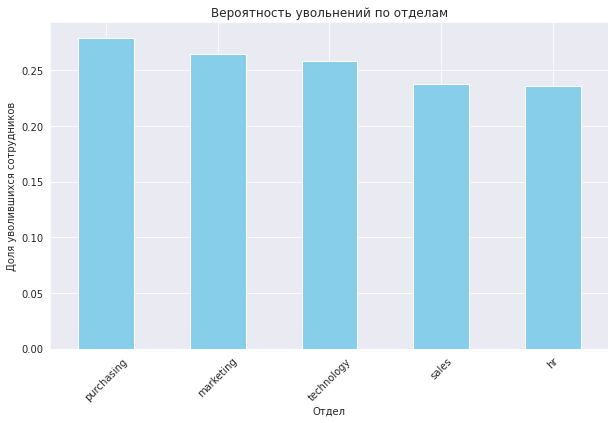

In [178]:
quit_by_dept = train_quit_df.groupby('dept')['quit'].value_counts(normalize=True).unstack()['yes']


plt.figure(figsize=(10, 6))
quit_by_dept.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Вероятность увольнений по отделам')
plt.xlabel('Отдел')
plt.ylabel('Доля уволившихся сотрудников')
plt.xticks(rotation=45)
plt.show()

* Доли увольнений по отделам находятся примерно на одном уровне, варьируясь от 25% до 30%. Наибольшая доля увольнений наблюдается в отделе технологий, за которым следуют продажи и закупки. Маркетинг и кадры имеют немного меньшие значения. Эти небольшие различия свидетельствуют о том, что фактор принадлежности к конкретному отделу не оказывает существенного влияния на вероятность увольнения.

##### Уровень загруженности

Сравним средний уровень загруженности для уволившихся сотрудников.

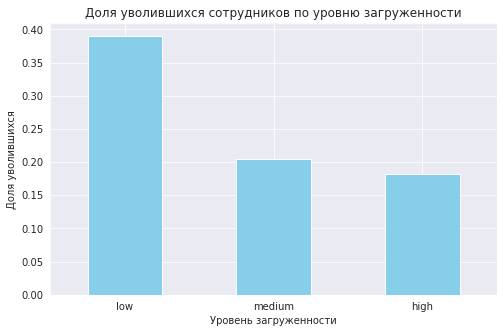

In [179]:
workload_quit_ratio = train_quit_df.groupby('workload')['quit'].value_counts(normalize=True).unstack()['yes']

plt.figure(figsize=(8, 5))
workload_quit_ratio.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Доля уволившихся сотрудников по уровню загруженности')
plt.xlabel('Уровень загруженности')
plt.ylabel('Доля уволившихся')
plt.xticks(rotation=0)
plt.show()

* Сотрудники с низкой загруженностью увольняются чаще всего, с долей увольнений 42%.


* Для сотрудников со средней загруженностью доля увольнений составляет 23%, а при высокой загруженности — 17%.


* Это может указывать на то, что низкая загруженность, возможно, связана с неудовлетворенностью сотрудников, а высокая загруженность, наоборот, может удерживать сотрудников, обеспечивая им более высокую вовлеченность в работу.

##### Средняя зарплата

Сравним среднюю зарплату уволившихся сотрудников с теми, кто остался.

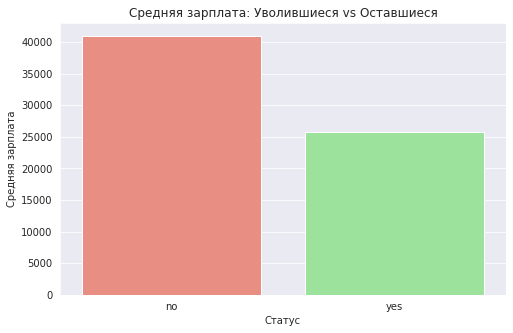

In [180]:
avg_salary_quit = train_quit_df.groupby('quit')['salary'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_quit.index, y=avg_salary_quit.values, palette=['salmon', 'lightgreen'])
plt.title('Средняя зарплата: Уволившиеся vs Оставшиеся')
plt.xlabel('Статус')
plt.ylabel('Средняя зарплата')
plt.show()

* Средняя зарплата уволившихся сотрудников составляет 23,885, тогда как у оставшихся сотрудников — 37,702.


* Этот разрыв может указывать на то, что низкий уровень зарплаты является фактором, повышающим вероятность увольнения.

##### Уровень занимаемой должности

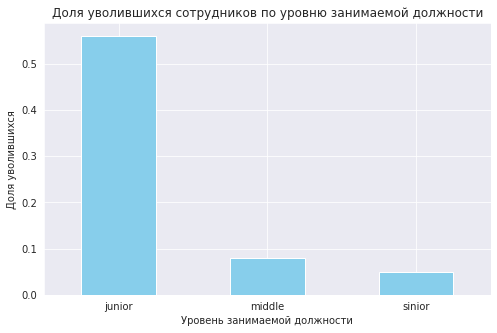

In [181]:
level_quit_ratio = train_quit_df.groupby('level')['quit'].value_counts(normalize=True).unstack()['yes']

plt.figure(figsize=(8, 5))
level_quit_ratio.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Доля уволившихся сотрудников по уровню занимаемой должности')
plt.xlabel('Уровень занимаемой должности')
plt.ylabel('Доля уволившихся')
plt.xticks(rotation=0)
plt.show()

* Наибольшая доля увольнений приходится на сотрудников уровня Junior. Доля увольнений значительно уменьшается на уровнях Middle и Senior.


* Это может указывать на то, что сотрудники с меньшим опытом и на более низких должностях чаще решают покинуть компанию, возможно, в поисках лучшего карьерного роста или условий.

##### Длительность работы в компании

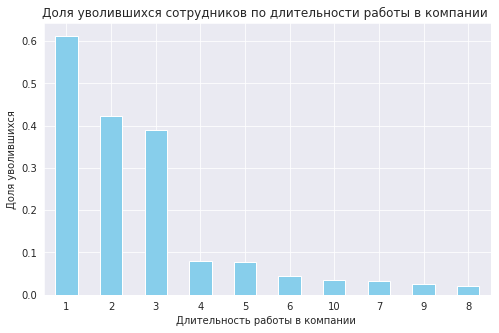

In [182]:
employment_quit_ratio = train_quit_df.groupby('employment_years')['quit'].value_counts(normalize=True).unstack()['yes']

plt.figure(figsize=(8, 5))
employment_quit_ratio.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Доля уволившихся сотрудников по длительности работы в компании ')
plt.xlabel('Длительность работы в компании ')
plt.ylabel('Доля уволившихся')
plt.xticks(rotation=0)
plt.show()

* Наиболее высокая доля увольнений наблюдается среди сотрудников с опытом работы в компании 1 год и 2 года.


* У сотрудников, работающих более 5 лет, доля увольнений снижается. Вероятно, сотрудники с более коротким сроком пребывания в компании еще не успели адаптироваться и сформировать сильную привязанность к коллективу.

##### Повышение за последний год

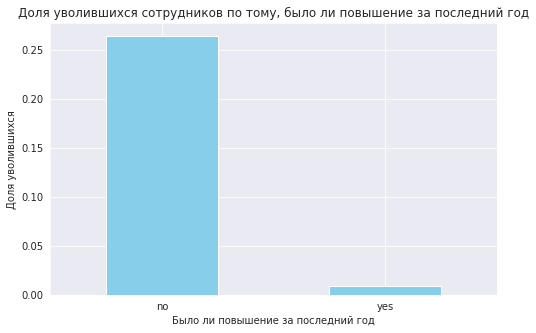

In [183]:
promo_quit_ratio = train_quit_df.groupby('last_year_promo')['quit'].value_counts(normalize=True).unstack()['yes']

plt.figure(figsize=(8, 5))
promo_quit_ratio.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Доля уволившихся сотрудников по тому, было ли повышение за последний год')
plt.xlabel('Было ли повышение за последний год')
plt.ylabel('Доля уволившихся')
plt.xticks(rotation=0)
plt.show()

* Доля увольнений среди сотрудников, не получивших повышение, составляет 26%, тогда как среди тех, кто получил повышение, всего 0.9%.


* Отсутствие повышения может быть фактором, снижающим мотивацию сотрудников оставаться в компании, так как отсутствие карьерного роста может рассматриваться ими как отсутствие перспектив.

##### Нарушение договора за последний год

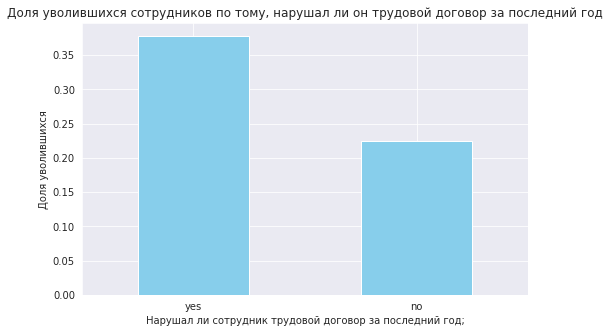

In [184]:
violations_quit_ratio = train_quit_df.groupby('last_year_violations')['quit'].value_counts(normalize=True).unstack()['yes']

plt.figure(figsize=(8, 5))
violations_quit_ratio.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Доля уволившихся сотрудников по тому, нарушал ли он трудовой договор за последний год')
plt.xlabel('Нарушал ли сотрудник трудовой договор за последний год;')
plt.ylabel('Доля уволившихся')
plt.xticks(rotation=0)
plt.show()

* Доля увольнений выше среди сотрудников, допустивших нарушения, чем среди тех, кто соблюдал трудовой договор.


* Это говорит о том, что склонность к нарушению дисциплины связана с намерением сотрудников покинуть компанию, возможно, из-за низкой мотивации или неудовлетворенности условиями труда.

##### Оценка руководителя

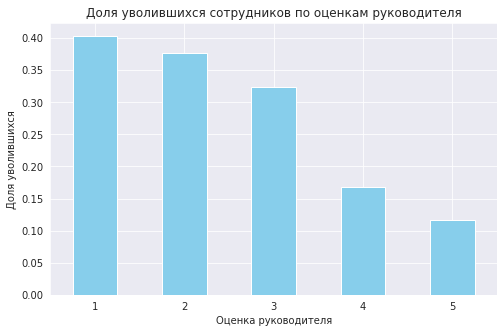

In [185]:
supervisor_quit_ratio = train_quit_df.groupby('supervisor_evaluation')['quit'].value_counts(normalize=True).unstack()['yes']

plt.figure(figsize=(8, 5))
supervisor_quit_ratio.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Доля уволившихся сотрудников по оценкам руководителя')
plt.xlabel('Оценка руководителя')
plt.ylabel('Доля уволившихся')
plt.xticks(rotation=0)
plt.show()

* Сотрудники с низкими оценками руководителя (1 и 2) имеют высокую долю увольнений. По мере повышения оценки (3, 4, 5), доля увольнений снижается.


* Это говорит о том, что сотрудники, получающие низкие оценки, чувствуют себя менее мотивированными и менее ценными для компании, что приводит к их уходу.

##### Портрет уволившегося сотрудника:

Теперь мы можем составить примерный портрет уволившегося сотрудника:

* `Зарплата`: Уволившиеся сотрудники в среднем получают значительно меньшую зарплату по сравнению с оставшимися в компании. Это указывает на то, что низкий уровень дохода может быть важным фактором для увольнения.


* `Уровень загруженности`: Наибольшая доля увольнений наблюдается среди сотрудников с низкой загруженностью, за ними следуют сотрудники со средней загруженностью, а наименьшая доля — у сотрудников с высокой загруженностью. Это может говорить о том, что низкая загруженность связана с неудовлетворенностью или отсутствием мотивации, что приводит к уходу.


* `Должность`: Чаще всего это сотрудники уровня Junior.


* `Отдел`: Вероятность увольнения среди отделов распределена примерно одинаково, без ярко выраженных различий. Все отделы показывают схожий уровень текучести кадров, варьирующийся от 25% до 30%, что говорит о том, что принадлежность к определенному отделу не является решающим фактором.


* `Стаж`: Обычно это сотрудники с опытом работы в компании не более 2 лет.


* `Повышения`: Вероятность увольнения выше среди тех, кто не получал повышения за последний год.


* `Дисциплина`: Сотрудники с нарушениями трудового договора также более склонны к увольнению.


* `Оценка руководителя`: Низкая оценка со стороны руководителя увеличивает вероятность ухода.


В целом, наиболее вероятный портрет уволившегося сотрудника — это сотрудник уровня Junior с опытом работы в компании менее 2 лет, не получивший повышения, имеющий низкую оценку от руководителя и, возможно, нарушавший трудовой договор за последний год.

#### Влияние удовлетворенности работой на увольнение

Аналитики предполагают, что уровень удовлетворенности влияет на увольнение. Давайте проверим это.

Для начала построим график распределния уровня удовлетворенности для уволившихся и оставшихся сотрудников

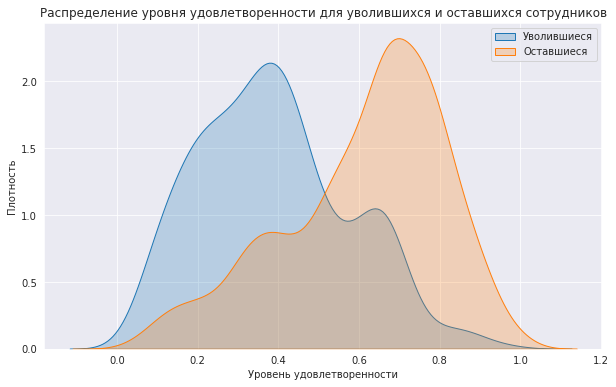

In [186]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df[combined_df['quit'] == 'yes'], x='job_satisfaction_rate', label='Уволившиеся', shade=True)
sns.kdeplot(data=combined_df[combined_df['quit'] == 'no'], x='job_satisfaction_rate', label='Оставшиеся', shade=True)
plt.title('Распределение уровня удовлетворенности для уволившихся и оставшихся сотрудников')
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Плотность')
plt.legend()
plt.show()

По графику видно, что уволившиеся сотрудники в среднем имеют более низкий уровень удовлетворенности работой, чем те, кто остался в компании. Пик распределения для уволившихся сотрудников находится в диапазоне низкой удовлетворенности (около 0.2-0.4), в то время как у оставшихся сотрудников пик наблюдается в более высоком диапазоне (около 0.6-0.8).


Низкий уровень удовлетворенности работой действительно оказывает влияние на вероятность увольнения сотрудников. Те, кто не удовлетворен работой, с большей вероятностью покидают компанию, что следует учитывать для снижения текучести кадров.

### Добавление нового входного признака

Теперь когда мы убедились что `job_satisfaction_rate` и `quit` действительно связаны, добавим `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам нашей задачи.

Создадим переменную, которая содержит список признаков (столбцов), используемых для предсказания `job_satisfaction_rate` в первой задаче

In [189]:
features = ['dept', 'level', 'workload', 'supervisor_evaluation',
                             'last_year_promo', 'last_year_violations', 'salary', 'employment_years']

Применяем лучшую модель для предсказания `job_satisfaction_rate` для всех записей во второй задаче.

In [190]:
train_quit_df['job_satisfaction_rate'] = best_model.predict(train_quit_df[features])
train_quit_df

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.649130
814010,sales,junior,medium,2,no,no,4,27600,no,0.830719
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.401706
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.332401
910140,marketing,junior,medium,2,no,no,5,25200,no,0.729145
...,...,...,...,...,...,...,...,...,...,...
778735,technology,junior,low,2,no,no,4,22800,yes,0.809089
106936,marketing,junior,low,1,no,no,5,18000,no,0.805249
775320,technology,junior,high,1,no,no,4,42000,yes,0.544576


### Подготовка данных

Разобьем данные на выборки

In [191]:
RANDOM_STATE = 122
# Загрузка данных
X_train = train_quit_df.drop(['quit'], axis=1)
y_train = train_quit_df['quit']
X_test = combined_df.drop(['quit'], axis=1)
y_test = combined_df['quit'] 

Используем кодировщик LabelEncoder

Перед тем как искать лучшую модель, закодируем строковые классы числами — так вычисления выполнятся быстрее. Сделать это можно с помощью кодировщика LabelEncoder. Он переведёт строковые значения целевого признака в порядковые числа.

In [192]:
label_encoder = LabelEncoder()

# обучите модель и трансформируйте тренировочную выборку 
y_train = label_encoder.fit_transform(y_train)

# трансформируем тестовую выборку
y_test = label_encoder.transform(y_test)

In [193]:
cols_ohe = ['dept']

In [194]:
cols_ordinal = ['level', 'workload', 'last_year_promo', 'last_year_violations']

In [195]:
cols_to_scale = ['salary', 'employment_years', 'supervisor_evaluation', 'job_satisfaction_rate']

Добавим шаг для отбора признаков с помощью `SelectKBest`

In [196]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('select_best', SelectKBest(score_func=f_classif, k=12)),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

### Обучение модели

Мы обучим три модели: `RandomForestClassifier`, `GradientBoostingClassifier`, `LogisticRegression`. Для каждой модели мы определим набор гиперпараметров, которые хотели бы оптимизировать с помощью `RandomizedSearchCV`.

In [197]:
param_grid = [
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300],
        'models__max_depth': [15, 20, 25, 30],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300],
        'models__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'models__max_depth': range(4, 8),
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

RandomizedSearchCV: Этот метод случайным образом выбирает комбинации гиперпараметров, что может существенно сократить время подбора, при этом позволяя находить достаточно хорошее решение.

In [198]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)
print('RandomizedSearchCV - Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('RandomizedSearchCV - Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

RandomizedSearchCV - Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ordered',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
  

Проверим нашу модель на адекватность на адекватность с помощью `DummyClassifier`

In [199]:
dummy_classifier = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_classifier.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_dummy_pred = dummy_classifier.predict(X_test)

# Оценка качества DummyClassifier
dummy_roc_auc = roc_auc_score(y_test, y_dummy_pred)

# Результаты
print(f'ROC-AUC для DummyClassifier: {dummy_roc_auc}')

ROC-AUC для DummyClassifier: 0.5


проверим на тестовой выборке

In [202]:
y_test_pred_prob = randomized_search.predict_proba(X_test)[:, 1]
roc_auc_best_model = roc_auc_score(y_test, y_test_pred_prob)
print(f'Метрика ROC-AUC на тестовой выборке для лучшей модели: {roc_auc_best_model}')

Метрика ROC-AUC на тестовой выборке для лучшей модели: 0.9308584721152138


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. Мы достигли результата

### Промежуточные выводы


В ходе экспериментов было протестировано несколько моделей, включая `RandomForestClassifier`, `GradientBoostingClassifier` и `LogisticRegression`. Наилучший результат по метрике `ROC-AUC` на кросс-валидации показала модель `GradientBoostingClassifier` с настроенными гиперпараметрами:

learning_rate: 0.01, max_depth: 6, min_samples_leaf: 2, n_estimators: 300

Метрика на кросс-валидации (ROC-AUC): 0.9336


* Градиентный бустинг `(Gradient Boosting)` последовательно улучшает качество модели, обучая каждое новое дерево на ошибках предыдущих. Это делает его эффективным для задач с нелинейными зависимостями и позволяет достигать высокой точности при достаточном числе деревьев.


* Тонкая настройка гиперпараметров: Настройка гиперпараметров, таких как learning_rate, max_depth, и n_estimators, позволила модели лучше адаптироваться к данным, сохранив баланс между сложностью модели и предотвращением переобучения.


* Предобработка данных: Использование пайплайна с предобработкой (например, RobustScaler для масштабирования числовых признаков) также помогло модели быть устойчивее к выбросам и масштабу признаков.


* Для сравнения была использована модель DummyClassifier, которая продемонстрировала ROC-AUC на уровне 0.5, что соответствует случайному угадыванию. Это подчеркивает, что модель GradientBoostingClassifier с подобранными гиперпараметрами значительно превосходит случайное предсказание и успешно улавливает зависимость между признаками и целевой переменной.


* Модель GradientBoostingClassifier с оптимизированными гиперпараметрами показала наилучшие результаты и достигла метрики ROC-AUC выше 0.91, что соответствует критерию успеха для данной задачи.

## Общий вывод по проекту

Целью проекта было помочь компании `Работа с заботой` улучшить управление персоналом с помощью машинного обучения. Задача состояла из двух частей:

1. Построить модель для предсказания уровня удовлетворённости сотрудника на основе предоставленных данных.

2. Построить модель для предсказания вероятности увольнения сотрудника, что поможет HR-отделу заранее выявлять риски потери кадров.

Внезапные увольнения сотрудников могут нанести серьёзный ущерб компании, особенно если уходят ключевые специалисты. Поэтому предсказание уровня удовлетворённости и вероятности увольнения позволяет компании заранее предпринимать меры по удержанию сотрудников и снижению финансовых потерь.

-------------

Анализ данных:

* Мы начали с изучения предоставленных данных, которые включали информацию о сотрудниках, таких как отдел, должностной уровень, стаж работы, заработная плата, оценка от руководителя, результаты тестов на наличие нарушений и на промоции за последний год, и др.


* Проанализировали распределения признаков, выявили наличие пропусков и выбросов. Это помогло нам лучше понять структуру данных и определить подход к их предобработке.

--------------------

Подготовка данных:


* Обработка пропусков: Пропущенные значения были заполнены с использованием стратегии на основе наиболее часто встречающихся значений или специальных кодировок для категориальных признаков.


* Кодирование категориальных признаков: Применили One-Hot Encoding для признаков, не имеющих иерархии, и Ordinal Encoding для признаков с порядковой структурой.


* Масштабирование данных: Признаки с числовыми значениями были масштабированы с использованием StandardScaler, MinMaxScaler, RobustScaler чтобы снизить влияние выбросов.


* Пайплайн обработки: Создали пайплайн предобработки, чтобы стандартизировать все этапы подготовки данных. Это позволило использовать одинаковую предобработку как для первой задачи (удовлетворённость), так и для второй (увольнение).

----------------

Построение моделей:


* Для первой задачи мы обучили несколько регрессионных моделей для предсказания уровня удовлетворённости сотрудников. Проводили настройку гиперпараметров, чтобы улучшить метрику качества, выбирая лучшую модель на основе метрики SMAPE.


* Во второй задаче мы построили классификационные модели для предсказания увольнений. Модель GradientBoostingClassifier с подбором гиперпараметров продемонстрировала наилучший результат с метрикой `ROC-AUC`, что соответствует критерию успеха для данной задачи.


-----------


Модель предсказания удовлетворённости сотрудников позволяет компании выявлять группы сотрудников с низким уровнем удовлетворённости и направлять усилия на улучшение их опыта работы. Это может включать организацию дополнительных обучающих мероприятий, улучшение условий работы, пересмотр системы премий и т.п.


Модель предсказания увольнений поможет HR-отделу отслеживать сотрудников, которые с высокой вероятностью могут покинуть компанию. Это позволит компании заранее принимать меры для удержания таких сотрудников, предлагая им повышение, изменение задач или улучшение условий труда.
